# Phase 1: Data Preparation

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn loguru



In [ ]:

!git clone https://github.com/habeshaethiopia/Credit-Scoring-Model.git
%cd Credit-Scoring-Model



fatal: destination path 'Credit-Scoring-Model' already exists and is not an empty directory.
/content/Credit-Scoring-Model


In [ ]:
from loguru import logger

logger.add("eda_logs.log", format="{time} {level} {message}", level="INFO", rotation="10 MB")


2

In [ ]:
import requests
import os
import re

class GoogleDriveDownloader:
    def __init__(self):
        pass

    def download_file_from_link(self, file_link, destination_folder):
        """
        Download a file from a Google Drive link and save it to a specific destination folder
        with its original filename.

        :param file_link: The Google Drive file link.
        :param destination_folder: The folder where the file will be saved.
        """
        try:
            # Extract the file ID from the link
            file_id = self._extract_file_id(file_link)
            if not file_id:
                raise ValueError("Invalid Google Drive link.")

            # Construct the download URL
            download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

            # Ensure the destination folder exists
            if not os.path.exists(destination_folder):
                os.makedirs(destination_folder)

            # Start a session to handle cookies (for large files)
            session = requests.Session()

            # Download the file
            response = session.get(download_url, stream=True)
            response.raise_for_status()  # Raise an error for bad status codes

            # Extract the filename from the Content-Disposition header
            content_disposition = response.headers.get("Content-Disposition")
            if content_disposition:
                # Extract the filename using regex
                filename_match = re.findall('filename="(.+)"', content_disposition)
                if filename_match:
                    filename = filename_match[0]
                else:
                    # Fallback: Use a default filename if extraction fails
                    filename = f"file_{file_id}"
            else:
                # Fallback: Use a default filename if no Content-Disposition header is found
                filename = f"file_{file_id}"

            # Full path to save the file
            output_path = os.path.join(destination_folder, filename)

            # Save the file to the specified output path
            with open(output_path, "wb") as file:
                for chunk in response.iter_content(chunk_size=8192):
                    file.write(chunk)

            print(f"File downloaded successfully to {output_path}")

        except Exception as e:
            print(f"Failed to download file: {e}")

    def _extract_file_id(self, file_link):
        """
        Extract the file ID from a Google Drive link.

        :param file_link: The Google Drive file link.
        :return: The file ID or None if the link is invalid.
        """
        if "file/d/" in file_link:
            # Link format: https://drive.google.com/file/d/FILE_ID/view
            start_index = file_link.find("file/d/") + len("file/d/")
            end_index = file_link.find("/", start_index)
            return file_link[start_index:end_index] if end_index != -1 else file_link[start_index:]
        elif "id=" in file_link:
            # Link format: https://drive.google.com/open?id=FILE_ID
            start_index = file_link.find("id=") + len("id=")
            end_index = file_link.find("&", start_index)
            return file_link[start_index:end_index] if end_index != -1 else file_link[start_index:]
        else:
            return None




In [ ]:

from src.data_preparation import GoogleDriveDownloader
downloader = GoogleDriveDownloader()
file_link =     'https://drive.google.com/file/d/1D4KFJmL36wZEQD48md2kMPlKycrg_3HB/view'
output_path = "./Data"  # Replace with your desired output file path
downloader.download_file_from_link(file_link, output_path)

File downloaded successfully to ./Data/data.csv


In [ ]:
import pandas as pd

df = pd.read_csv("./Data/data.csv")
print(df.head())
print(df.info())

# Check for missing values
print(df.isnull().sum())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [ ]:
# Summary statistics for numerical columns
print(df.describe())

# Frequency of categorical columns
print(df['FraudResult'].value_counts())
print(df['CurrencyCode'].value_counts())
print(df['CountryCode'].value_counts())
print(df['ChannelId'].value_counts())

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000
FraudResult
0    95469
1      193
Name: count, dtype: int64
CurrencyCode
UGX    95662
Name: count, dtype: int64
CountryCode
256    95662
Name: count, dtype: int64
ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


# Phase 2: Exploratory Data Analysis (EDA)

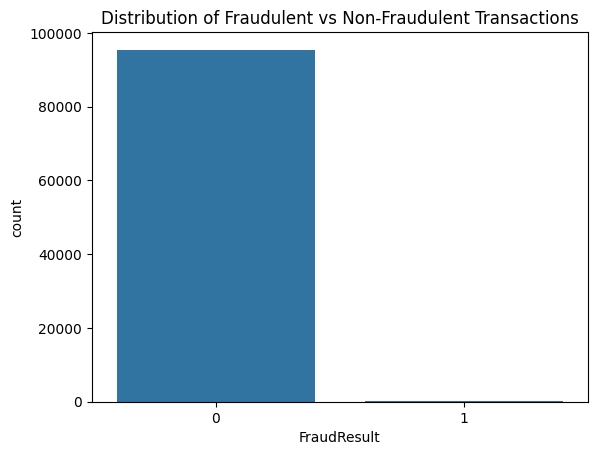

FraudResult
0    99.798248
1     0.201752
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='FraudResult', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# Percentage of fraud cases
fraud_percentage = df['FraudResult'].value_counts(normalize=True) * 100
print(fraud_percentage)


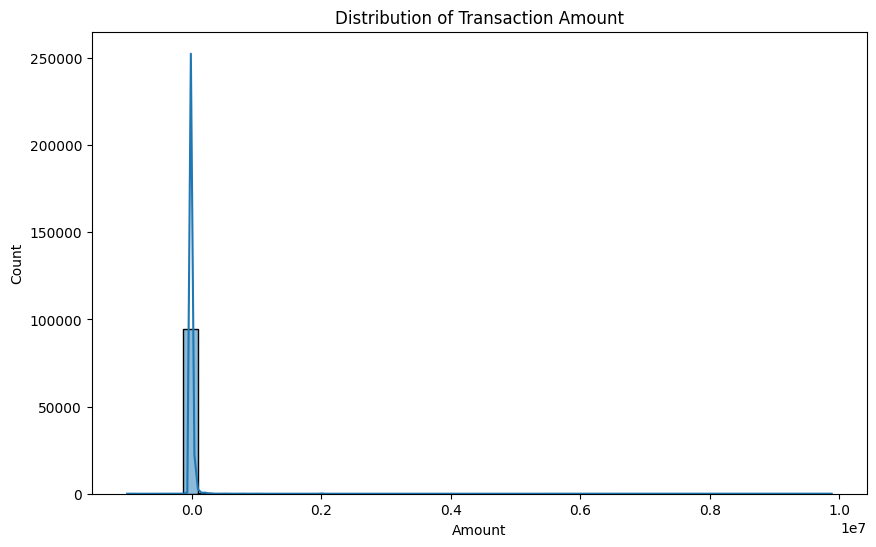

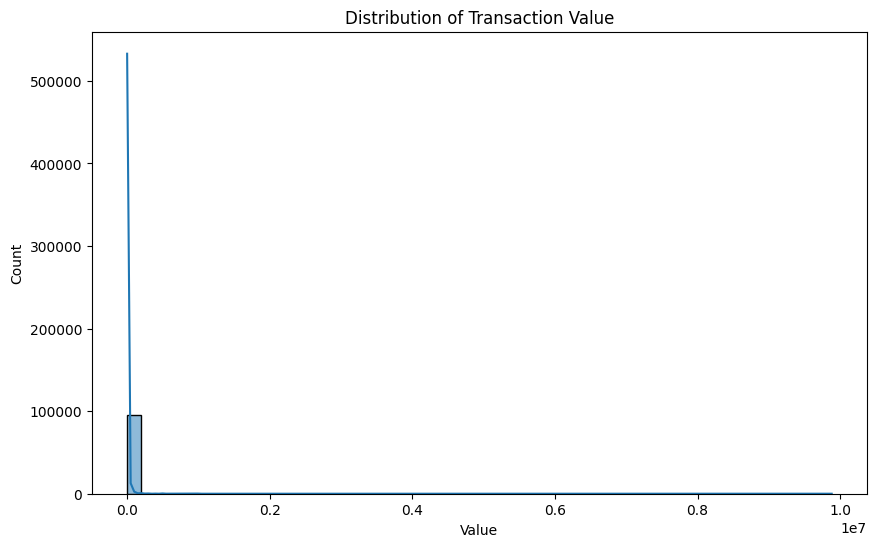

In [ ]:
# Plot the distribution of Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

# Plot the distribution of Value
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], bins=50, kde=True)
plt.title('Distribution of Transaction Value')
plt.show()

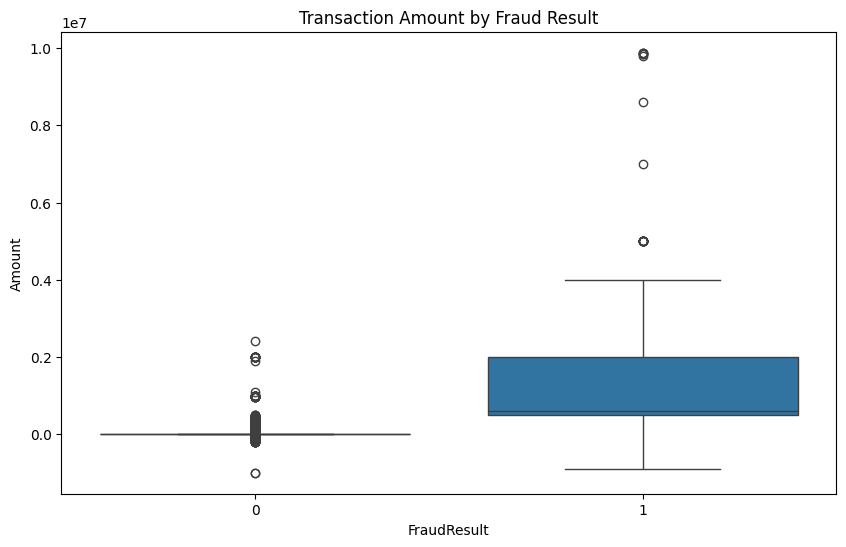

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='FraudResult', y='Amount', data=df)
plt.title('Transaction Amount by Fraud Result')
plt.show()

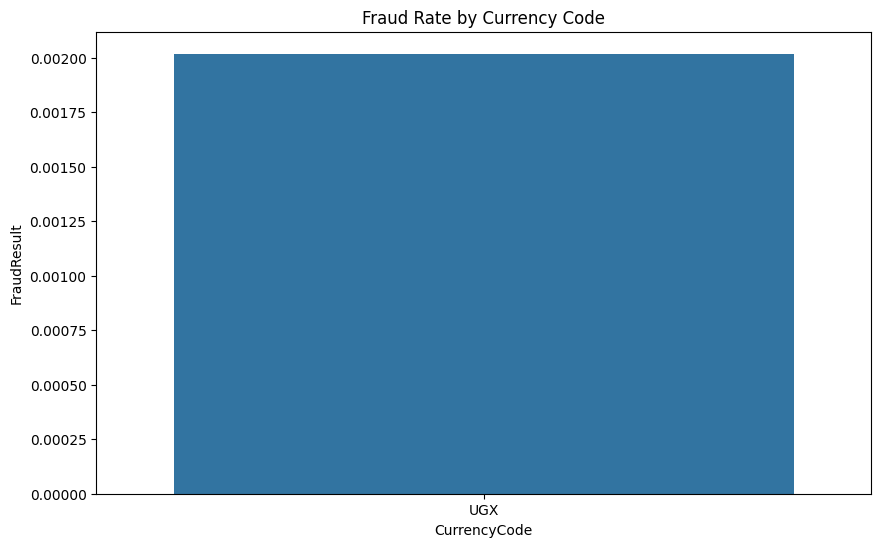

In [ ]:
# Calculate fraud rate by CurrencyCode
fraud_by_currency = df.groupby('CurrencyCode')['FraudResult'].mean().reset_index()

# Plot fraud rate by CurrencyCode
plt.figure(figsize=(10, 6))
sns.barplot(x='CurrencyCode', y='FraudResult', data=fraud_by_currency)
plt.title('Fraud Rate by Currency Code')
plt.show()

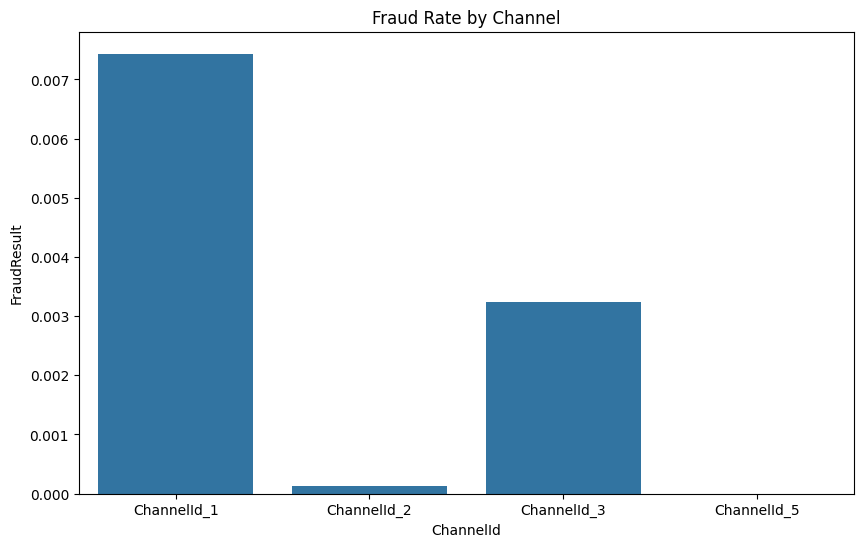

In [ ]:
# Calculate fraud rate by ChannelId
fraud_by_channel = df.groupby('ChannelId')['FraudResult'].mean().reset_index()

# Plot fraud rate by ChannelId
plt.figure(figsize=(10, 6))
sns.barplot(x='ChannelId', y='FraudResult', data=fraud_by_channel)
plt.title('Fraud Rate by Channel')
plt.show()

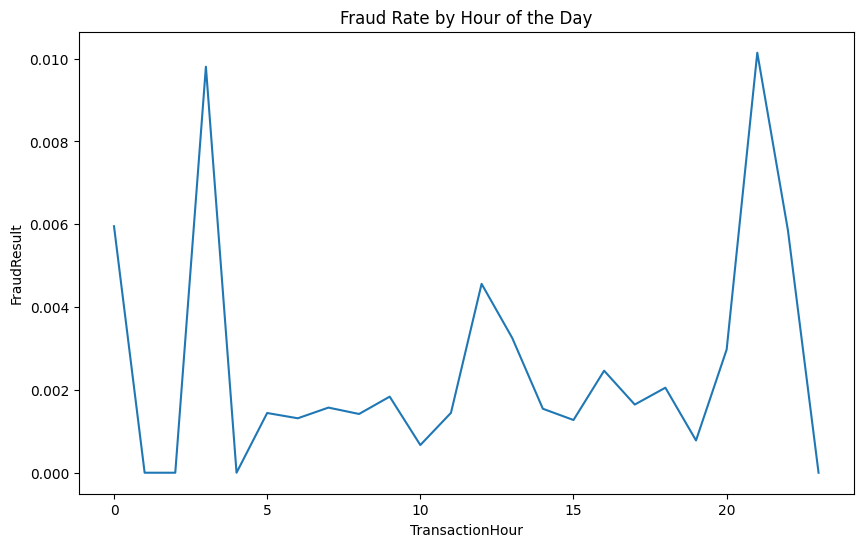

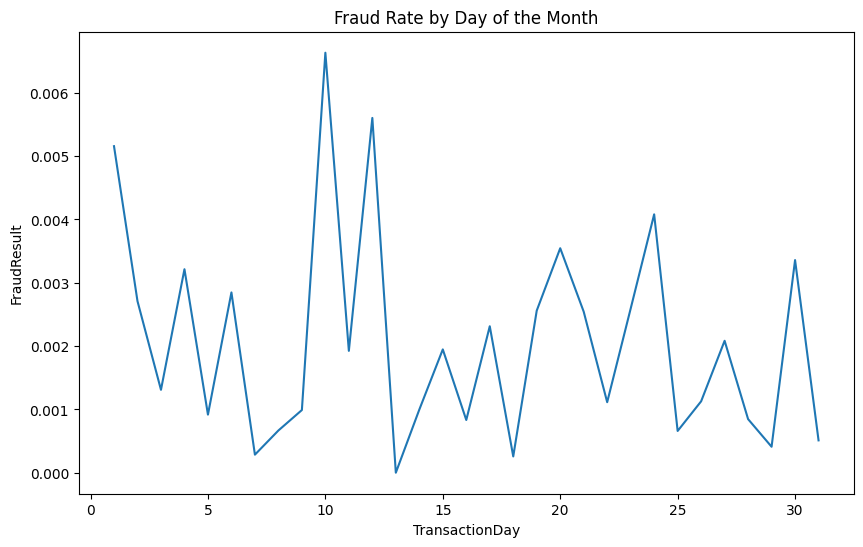

In [ ]:
# Convert TransactionStartTime to datetime
data=df
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

# Extract hour, day, and month
data['TransactionHour'] = data['TransactionStartTime'].dt.hour
data['TransactionDay'] = data['TransactionStartTime'].dt.day
data['TransactionMonth'] = data['TransactionStartTime'].dt.month

# Plot fraud rate by hour
fraud_by_hour = data.groupby('TransactionHour')['FraudResult'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='TransactionHour', y='FraudResult', data=fraud_by_hour)
plt.title('Fraud Rate by Hour of the Day')
plt.show()

# Plot fraud rate by day
fraud_by_day = data.groupby('TransactionDay')['FraudResult'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='TransactionDay', y='FraudResult', data=fraud_by_day)
plt.title('Fraud Rate by Day of the Month')
plt.show()

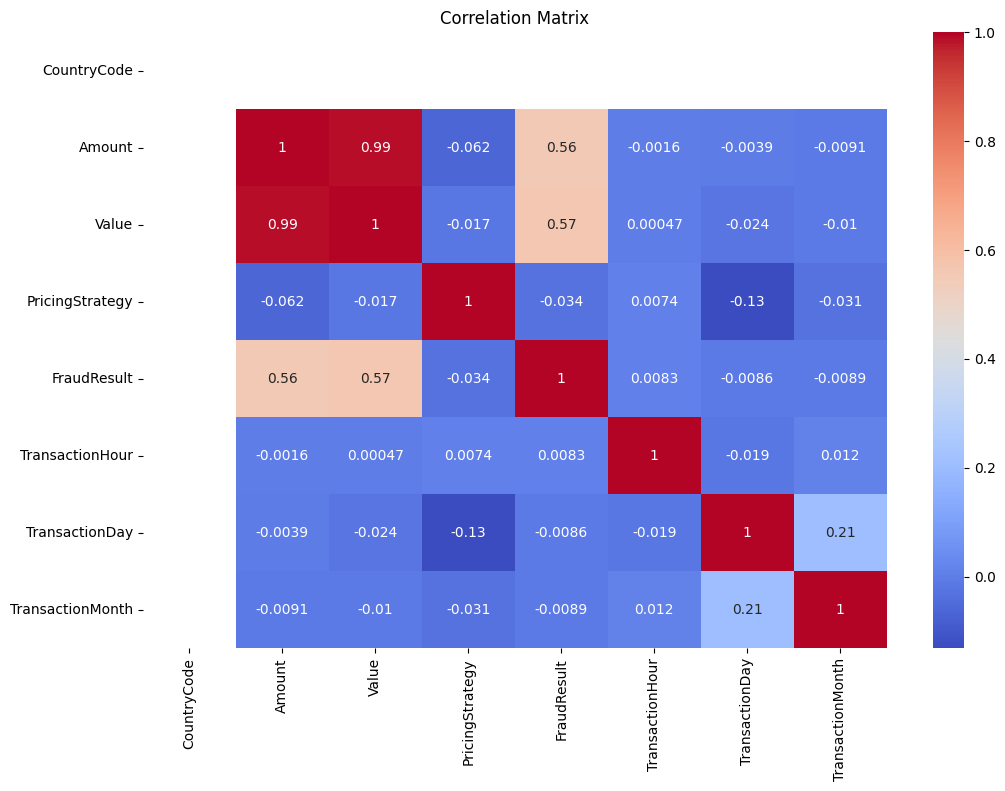

In [ ]:
# Correlation matrix
corr_matrix = data.select_dtypes(include=['number']).corr() # Select only numeric columns

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

In [ ]:
# Number of transactions per customer
data['TransactionCount'] = data.groupby('AccountId')['TransactionId'].transform('count')

In [ ]:
# Average transaction amount per customer
data['AvgTransactionAmount'] = data.groupby('AccountId')['Amount'].transform('mean')

In [ ]:
# Time since the last transaction
data['TimeSinceLastTransaction'] = data.groupby('AccountId')['TransactionStartTime'].diff().dt.total_seconds() / 3600  # in hours

# Extract day of the week, month, and hour
data['TransactionDayOfWeek'] = data['TransactionStartTime'].dt.dayofweek
data['TransactionMonth'] = data['TransactionStartTime'].dt.month
data['TransactionHour'] = data['TransactionStartTime'].dt.hour

In [ ]:
# Number of unique products per customer
data['UniqueProductCount'] = data.groupby('AccountId')['ProductId'].transform('nunique')

# Number of unique product categories per customer
data['UniqueCategoryCount'] = data.groupby('AccountId')['ProductCategory'].transform('nunique')

In [ ]:
# Number of past fraudulent transactions per customer
data['PastFraudCount'] = data.groupby('AccountId')['FraudResult'].transform('cumsum') - data['FraudResult']

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values
data['TimeSinceLastTransaction'].fillna(0, inplace=True)  # Fill NaNs with 0 for the first transaction

TransactionId               0
BatchId                     0
AccountId                   0
SubscriptionId              0
CustomerId                  0
CurrencyCode                0
CountryCode                 0
ProviderId                  0
ProductId                   0
ProductCategory             0
ChannelId                   0
Amount                      0
Value                       0
TransactionStartTime        0
PricingStrategy             0
FraudResult                 0
TransactionHour             0
TransactionDay              0
TransactionMonth            0
TransactionCount            0
AvgTransactionAmount        0
TimeSinceLastTransaction    0
TransactionDayOfWeek        0
UniqueProductCount          0
UniqueCategoryCount         0
PastFraudCount              0
dtype: int64


<ipython-input-66-c8fdbbc98eb4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TimeSinceLastTransaction'].fillna(0, inplace=True)  # Fill NaNs with 0 for the first transaction


## Encode Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example: Encoding ChannelId (if it has an order)
label_encoder = LabelEncoder()
data['ChannelId'] = label_encoder.fit_transform(data['ChannelId'])
data['AccountId'] = label_encoder.fit_transform(data['AccountId'] )
data['ProductId'] = label_encoder.fit_transform(data['ProductId'] )
data['ProviderId'] = label_encoder.fit_transform(data['ProviderId'] )

In [ ]:
# One-hot encode CurrencyCode, CountryCode, and ProductCategory
data = pd.get_dummies(data, columns=['CurrencyCode', 'CountryCode', 'ProductCategory'], drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
numerical_features = ['Amount', 'Value', 'TransactionCount', 'AvgTransactionAmount', 'TimeSinceLastTransaction', 'UniqueProductCount', 'UniqueCategoryCount', 'PastFraudCount']

# Scale numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
# Drop unnecessary columns
data = data.drop(['TransactionId', 'BatchId', 'SubscriptionId', 'CustomerId', 'TransactionStartTime'], axis=1)

In [ ]:
# Display the first few rows of the final dataset
print(data.head())

# Check the shape of the dataset
print(data.shape)

        AccountId    ProviderId     ProductId  ChannelId    Amount     Value  \
0  AccountId_3957  ProviderId_6  ProductId_10          2 -0.046371 -0.072291   
1  AccountId_4841  ProviderId_4   ProductId_6          1 -0.054643 -0.080251   
2  AccountId_4229  ProviderId_6   ProductId_1          2 -0.050426 -0.076352   
3   AccountId_648  ProviderId_1  ProductId_21          2  0.107717  0.096648   
4  AccountId_4841  ProviderId_4   ProductId_6          1 -0.059704 -0.075183   

   PricingStrategy  FraudResult  TransactionHour  TransactionDay  ...  \
0                2            0                2              15  ...   
1                2            0                2              15  ...   
2                2            0                2              15  ...   
3                2            0                3              15  ...   
4                2            0                3              15  ...   

   UniqueCategoryCount  PastFraudCount  ProductCategory_data_bundles  \
0       

In [ ]:
# Save the preprocessed data to a new CSV file
data.to_csv('Data/preprocessed_data.csv', index=False)

In [ ]:
import pandas as pd
import csv

data=pd.read_csv('Data/preprocessed_data.csv')


In [ ]:
from sklearn.model_selection import train_test_split


# Define features (X) and target (y)
X = data.drop('FraudResult', axis=1)  # All columns except the target
y = data['FraudResult']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(76529, 25) (19133, 25) (76529,) (19133,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.54      0.38      0.45        39

    accuracy                           1.00     19133
   macro avg       0.77      0.69      0.72     19133
weighted avg       1.00      1.00      1.00     19133

ROC-AUC Score: 0.6919672712330092


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.97      0.87      0.92        39

    accuracy                           1.00     19133
   macro avg       0.99      0.94      0.96     19133
weighted avg       1.00      1.00      1.00     19133

ROC-AUC Score: 0.9358712496609218


# **Handle Class Imbalance**
If the dataset is imbalanced (e.g., very few fraud cases), the model might be biased toward the majority class. Use techniques to handle class imbalance.

## Option 1: Class Weights
Adjust class weights in the model to penalize misclassification of the minority class

In [ ]:
# Initialize the model with class weights
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_balanced.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_balanced.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.94      0.82      0.88        39

    accuracy                           1.00     19133
   macro avg       0.97      0.91      0.94     19133
weighted avg       1.00      1.00      1.00     19133

ROC-AUC Score: 0.9102040377833821


## Option 2: SMOTE (Synthetic Minority Oversampling Technique)
Oversample the minority class using SMOTE.

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the model
rf_smote = RandomForestClassifier(random_state=42)

# Train the model
rf_smote.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = rf_smote.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.74      0.87      0.80        39

    accuracy                           1.00     19133
   macro avg       0.87      0.94      0.90     19133
weighted avg       1.00      1.00      1.00     19133

ROC-AUC Score: 0.9355832010592668


# Feature Importance
Analyze the importance of each feature in the model.

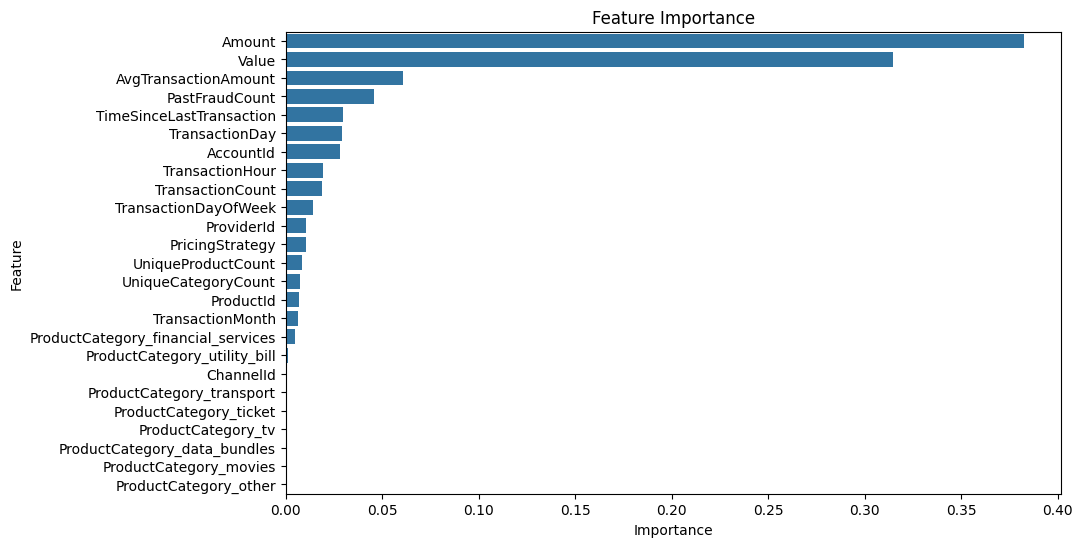

In [ ]:
# Get feature importances from the Random Forest model
importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Hyperparameter Tuning
Optimize the model’s hyperparameters using techniques like Grid Search or Random Search.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

# Train the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best ROC-AUC Score: 0.9962052213956016
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.94      0.87      0.91        39

    accuracy                           1.00     19133
   macro avg       0.97      0.94      0.95     19133
weighted avg       1.00      1.00      1.00     19133

ROC-AUC Score: 0.9358450634244077


# Evaluate the Final Model
Evaluate the final model’s performance on the test set using metrics like:
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC

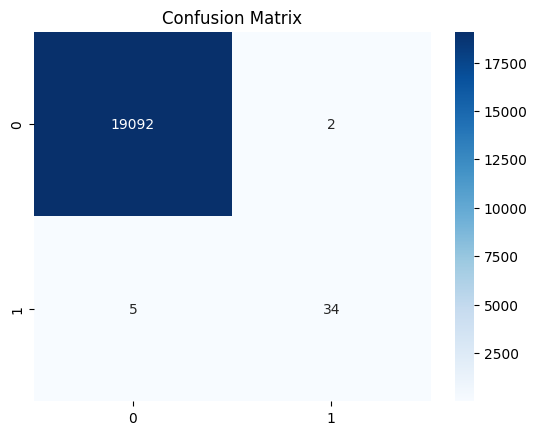

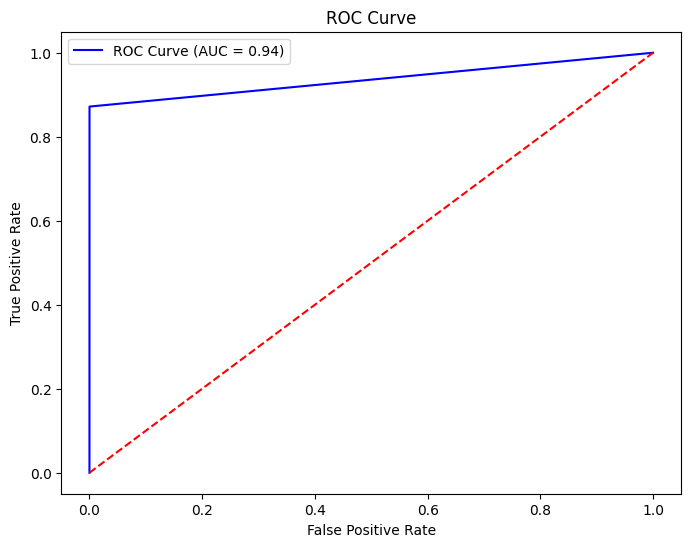

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Save the Model
Save the trained model for future use to serv the api

In [ ]:
import joblib

# Save the trained model
joblib.dump(best_rf, 'credit_scoring_model.pkl')

# Save the scaler (if used)
joblib.dump(scaler, 'scaler.pkl')

# Save the label encoder (if used)
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']